<font size ="5"><b>Package Installation</b></font>

In [2]:
# !pip install panda
# !pip install matplotlib
# !pip install numpy
# !pip install seaborn
# !pip install colorama

<font size = "3"><b>All imports</b></font>

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

<td bgcolor = "pink"><font size="5" ><b>Loading the dataset </b></font></td>

In [96]:
xls = pd.ExcelFile('HospitalDatabase.xlsx')
df_ED = pd.read_excel(xls, 'EDVisits')
df_PA = pd.read_excel(xls, 'Patients')
df_AmbV = pd.read_excel(xls,'AmbulatoryVisits')
df_ReAd = pd.read_excel(xls, 'ReAdmissionRegistry')
df_Dis = pd.read_excel(xls, 'Discharges')
df_Pro = pd.read_excel(xls, 'Providers')
df_EDU = pd.read_excel(xls, 'EDUnique')


<td bgcolor="yellow"><font size = "3"><b>81.Draw a Lollipop chart to show the pediatric patients counts based on visit type </b></font></td>

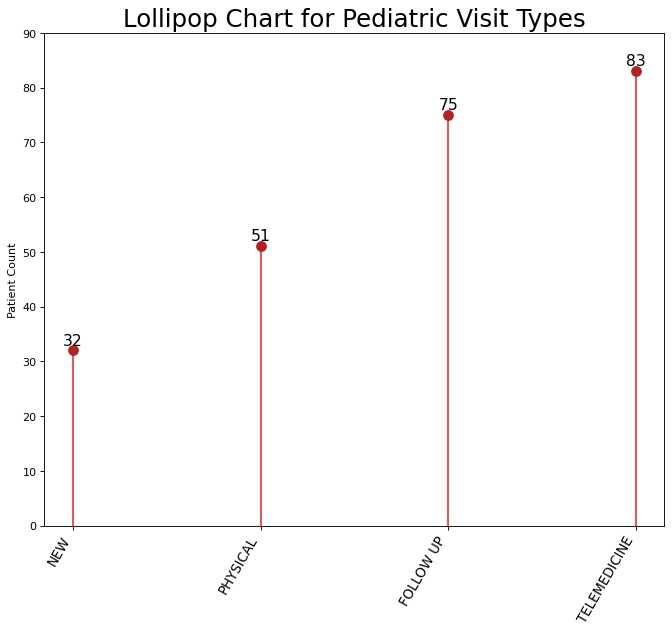

In [86]:
# # Prepare Data

#1. Join the providers and the ambulatory visits
#2. Filter only Pediatric visits
#3. Group by visit types and find unique patient count

#filtered_df = np.array(pd.merge(df_AmbV,df_Pro,on = 'ProviderID').query("ProviderSpecialty == 'Pediatrics'").groupby(['VisitType'])['PatientMRN'].nunique().sort_values(ascending=False))


filtered_df = pd.DataFrame(pd.merge(df_AmbV,df_Pro,on = 'ProviderID').query("ProviderSpecialty == 'Pediatrics'").groupby(['VisitType'])['PatientMRN'].nunique().sort_values(ascending=False))
filtered_df.sort_values('PatientMRN', inplace=True)
filtered_df.reset_index(inplace=True)

# # Draw plot
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
fig, ax = plt.subplots(figsize=(10,8), dpi= 80)
ax.vlines(x=filtered_df.index , ymin=0, ymax=filtered_df.PatientMRN, color='firebrick', alpha=0.7, linewidth=2)
plt.ylim(0, 90)
ax.scatter(x=filtered_df.index, y=filtered_df.PatientMRN, s=75, color='firebrick', alpha=1)

# # Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Pediatric Visit Types', fontdict={'size':22})
ax.set_ylabel('Patient Count')
ax.set_xticks(filtered_df.index)
ax.set_xticklabels(filtered_df.VisitType.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})


# # Annotate
for row in filtered_df.itertuples():
    ax.text(row.Index, row.PatientMRN+.5, s=round(row.PatientMRN, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()
#

<td bgcolor="yellow"><font size = "3"><b>82. Plot a funnel chart showing patient count for the different reasons for fatalities in the ICU.</font></b></td>

In [162]:
import plotly.express as px

#prepare data

data1 = dict(df_ReAd[['Service','DischargeDisposition','PrimaryDiagnosis','PatientID']].query("Service == 'ICU' & DischargeDisposition == 'Expired'").groupby('PrimaryDiagnosis')['PatientID'].nunique().sort_values(ascending=False))

PatientCount = list(data1.values())
PrimaryDiagnosis = list(data1.keys())


data = dict(
    PC = PatientCount,
    PD = PrimaryDiagnosis
)

#1 Funnel Chart plot
#fig = px.funnel(data, x='PC', y='PD',color_discrete_sequence = ['lightcoral'], opacity = 1)

#2 Funnel Area plot
fig = px.funnel_area(data, names = 'PD', values = 'PC')


fig.update_traces(textfont = {'color': 'white'})
fig.show()

